The optimized parameters:  [ 0.1598171 -0.0055281]
The obtained resistance values:  6257.152584710178 ohms
The covariance array:  [[0.00104801]]
Chi Squared Values:  1.8696741273660173e-06


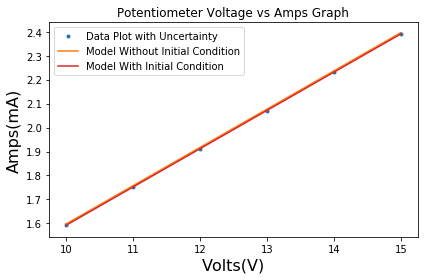

In [37]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def linear_model(x,m, b):
    return (m*x)+b
def linear_model_slope(x,m):
    return m*x
def chi_squared_red(obs, model, err, num_params=2):
    ratio = 1/(len(obs)-num_params)
    summation = np.sum(((obs-model)**2)/err**2)
    return ratio*summation

data = np.loadtxt('Potentiometer.txt', skiprows=1, delimiter=',')
voltage = data[:,0]
amps = data[:,1]
resistance = data[:,3]
errors = np.ones(len(voltage))
popt, pcov = curve_fit(linear_model, voltage, amps, sigma=errors, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))
popt1, pcov = curve_fit(linear_model_slope, voltage, amps,p0=[9.959], sigma=errors, absolute_sigma=True)
fig,ax = plt.subplots()
ax.plot(voltage, amps, linestyle="",marker=".")
ax.plot(voltage, linear_model_slope(voltage, popt[0]))
ax.set_title('Potentiometer Voltage vs Amps Graph')
ax.errorbar(voltage, amps, xerr=data[:,4]/100,yerr=data[:,5]/100, ls="none")
ax.plot(voltage, linear_model(voltage,popt[0], popt[1]))
ax.set_xlabel('Volts(V)', fontsize=16)
ax.set_ylabel('Amps(mA)', fontsize=16)
fig.tight_layout()
ax.legend(['Data Plot with Uncertainty','Model Without Initial Condition','Model With Initial Condition'])
print('The optimized parameters: ',popt)
print('The obtained resistance values: ', 1000/popt[0], 'ohms')
print('The covariance array: ',pcov)
print('Chi Squared Values: ', chi_squared_red(amps, linear_model(voltage,popt[0], 7),data[:,3]))